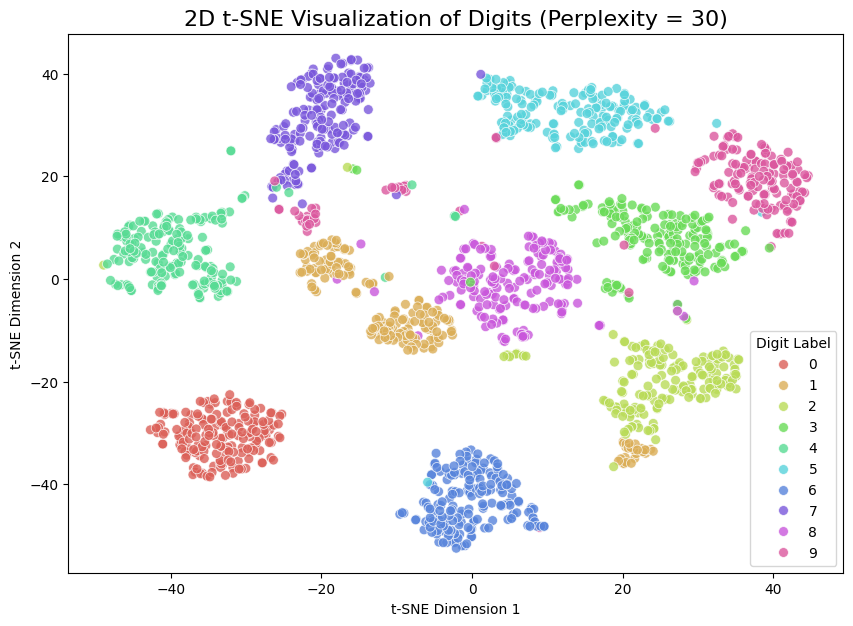


Running t-SNE for 3 components...


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

# --- Step 1: Load and Scale Data ---
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Scale the data (a crucial prerequisite for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 2: Apply 2D t-SNE Model ---
# We chose 30 as our "best" perplexity from the exploration step.
best_perplexity = 30
tsne_2d = TSNE(n_components=2,
               perplexity=best_perplexity,
               max_iter=1000,
               random_state=42)

# Apply the 2D t-SNE transformation to our scaled data
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

# Create a DataFrame for the 2D results
df_tsne_2d = pd.DataFrame(X_tsne_2d, columns=['tsne-2d-one', 'tsne-2d-two'])
df_tsne_2d['label'] = y

# --- Step 3: Visualize the 2D Result ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10), # Use a color palette with 10 distinct colors
    data=df_tsne_2d,
    legend="full",
    alpha=0.8,
    s=50 # Adjust point size
)
plt.title(f'2D t-SNE Visualization of Digits (Perplexity = {best_perplexity})', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Digit Label')
plt.show()



In [4]:

# --- Step 4: Apply 3D t-SNE Model ---
print("\nRunning t-SNE for 3 components...")
# 1. Load and Scale Data
digits = load_digits()
X = digits.data
y = digits.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply 3D t-SNE Model
tsne_3d = TSNE(n_components=3,
               perplexity=30,
               max_iter=1000,
               random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# Create a new DataFrame for the 3D coordinates
df_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['tsne-3d-one', 'tsne-3d-two', 'tsne-3d-three'])
df_tsne_3d['label'] = y

# 3. Visualize the 3D Result with Interactive Hover
fig_plotly_tsne = px.scatter_3d(
    df_tsne_3d,
    x='tsne-3d-one',
    y='tsne-3d-two',
    z='tsne-3d-three',
    color='label',
    title='Interactive 3D t-SNE Visualization with Hover Index',
    template='plotly_white',
    hover_data={'index': df_tsne_3d.index} # This adds the index to the hover tooltip
)

# Improve layout
fig_plotly_tsne.update_traces(marker=dict(size=2.5))
fig_plotly_tsne.update_layout(legend_title_text='Digit Label')
fig_plotly_tsne.show()



Running t-SNE for 3 components...
